In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import tokenize

import re
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.tsv",sep='\t')
test = pd.read_csv("test.tsv",sep='\t')

In [3]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [5]:
train = train.drop(['PhraseId', 'SentenceId'], axis=1)
test = test.drop(['PhraseId', 'SentenceId'], axis=1)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

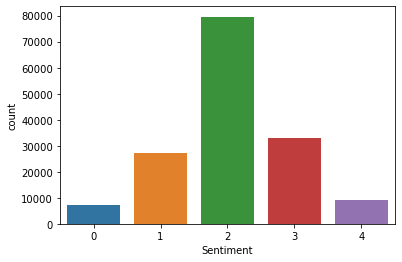

In [6]:
import seaborn as sns
sns.countplot(x='Sentiment',data=train)

In [7]:
#Lower

train['Phrase']=train.Phrase.apply(lambda x: x.lower())
train['Phrase']

0         a series of escapades demonstrating the adage ...
1         a series of escapades demonstrating the adage ...
2                                                  a series
3                                                         a
4                                                    series
                                ...                        
156055                                            hearst 's
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [8]:
#Punctuations

import string

def remove_punc(text):
    for i in string.punctuation:
        text=text.replace(i,' ')
    
    return text

train['Phrase']=train.Phrase.apply(remove_punc)
train['Phrase']

0         a series of escapades demonstrating the adage ...
1         a series of escapades demonstrating the adage ...
2                                                  a series
3                                                         a
4                                                    series
                                ...                        
156055                                            hearst  s
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [9]:
#stopwords

stopword_list=stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

train['Phrase'] = train.Phrase.apply(lambda x : " ".join(x for x in x.split() if x not in stopword_list))
train['Phrase']

0         series escapades demonstrating adage good goos...
1           series escapades demonstrating adage good goose
2                                                    series
3                                                          
4                                                    series
                                ...                        
156055                                               hearst
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [10]:
#tokenize

train['Phrase']=train.Phrase.apply(word_tokenize)
train['Phrase']

0         [series, escapades, demonstrating, adage, good...
1         [series, escapades, demonstrating, adage, good...
2                                                  [series]
3                                                        []
4                                                  [series]
                                ...                        
156055                                             [hearst]
156056                        [forced, avuncular, chortles]
156057                                [avuncular, chortles]
156058                                          [avuncular]
156059                                           [chortles]
Name: Phrase, Length: 156060, dtype: object

In [11]:
#numbers

def remove_numbers(words):
    
    new_words = []
    for word in words:
        new_word = re.sub("\d+", "", word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

train['Phrase']=train.Phrase.apply(remove_numbers)
train['Phrase']

0         [series, escapades, demonstrating, adage, good...
1         [series, escapades, demonstrating, adage, good...
2                                                  [series]
3                                                        []
4                                                  [series]
                                ...                        
156055                                             [hearst]
156056                        [forced, avuncular, chortles]
156057                                [avuncular, chortles]
156058                                          [avuncular]
156059                                           [chortles]
Name: Phrase, Length: 156060, dtype: object

In [12]:
#Lemmatize verbs

def lemmatize_verbs(words):
   
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

train['Phrase']=train.Phrase.apply(lemmatize_verbs)
train['Phrase']

0         [series, escapades, demonstrate, adage, good, ...
1         [series, escapades, demonstrate, adage, good, ...
2                                                  [series]
3                                                        []
4                                                  [series]
                                ...                        
156055                                             [hearst]
156056                          [force, avuncular, chortle]
156057                                 [avuncular, chortle]
156058                                          [avuncular]
156059                                            [chortle]
Name: Phrase, Length: 156060, dtype: object

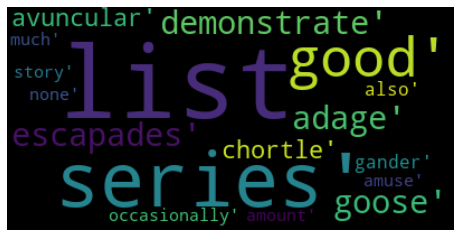

In [13]:
#wordcloud

text = train.Phrase.values

wordcloud = WordCloud(background_color = 'black', stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(figsize = (8,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [14]:
word_set = set()
for l in train['Phrase']:
    for e in l:
        word_set.add(e)
        
word_to_int = {word: i for i, word in enumerate(word_set, 1)}


train['Tokens'] = train['Phrase'].apply(lambda l: [word_to_int[word] for word in l])
train['Tokens'].head()

0    [5144, 6527, 6680, 5115, 5658, 8070, 5572, 565...
1                 [5144, 6527, 6680, 5115, 5658, 8070]
2                                               [5144]
3                                                   []
4                                               [5144]
Name: Tokens, dtype: object

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
max_len = train['Tokens'].str.len().max()
max_len

30

In [17]:
#Split

X_train = train.Phrase
y_train = train.Sentiment

X_test = test.Phrase

In [18]:
tokenize = Tokenizer()
tokenize.fit_on_texts(X_train.values)

In [19]:
X_train = tokenize.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, max_len)

In [20]:
X_test = tokenize.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, max_len)

In [21]:
print(X_train.shape)
print(X_test.shape)

(156060, 30)
(66292, 30)


In [22]:
#Model

EMBEDDING_DIM = 128
lstm_out = 196
a = len(tokenize.word_index)+1

model = Sequential()
model.add(Embedding(a, EMBEDDING_DIM, input_length=max_len))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2 ))
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 128)           1587584   
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 5)                 985       
Total params: 1,843,369
Trainable params: 1,843,369
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
print(y_train.shape)
print(X_train.shape)

(156060,)
(156060, 30)


In [24]:
#Fitting the model

model.fit(X_train, y_train, batch_size=128, epochs=7, verbose=1)

Epoch 1/7
1220/1220 [==============================] - 173s 140ms/step - loss: 1.0673 - accuracy: 0.5742
Epoch 2/7
1220/1220 [==============================] - 167s 136ms/step - loss: 0.7892 - accuracy: 0.6742
Epoch 3/7
1220/1220 [==============================] - 167s 136ms/step - loss: 0.7188 - accuracy: 0.7012
Epoch 4/7
1220/1220 [==============================] - 166s 136ms/step - loss: 0.6675 - accuracy: 0.7194
Epoch 5/7
1220/1220 [==============================] - 167s 137ms/step - loss: 0.6320 - accuracy: 0.7315
Epoch 6/7
1220/1220 [==============================] - 180s 147ms/step - loss: 0.6074 - accuracy: 0.7403
Epoch 7/7
1220/1220 [==============================] - 175s 144ms/step - loss: 0.5820 - accuracy: 0.7489


In [25]:
#Predictions

predictions = model.predict_classes(X_test)

In [26]:
predictions

array([2, 2, 2, ..., 2, 2, 1], dtype=int64)

In [27]:
pred_out = pd.DataFrame({'Phrase': test.Phrase,'Predicted_Sentiment':predictions})
pred_out

,Phrase,Predicted_Sentiment
0,An intermittently pleasing but mostly routine ...,2
1,An intermittently pleasing but mostly routine ...,2
2,An,2
3,intermittently pleasing but mostly routine effort,2
4,intermittently pleasing but mostly routine,1
...,...,...
66287,"A long-winded , predictable scenario .",2
66288,"A long-winded , predictable scenario",2
66289,"A long-winded ,",2
66290,A long-winded,2
